The implementation of the perceptron algorithm could be found here: https://github.com/Hedavam/Hedavam.github.io/blob/main/perceptron.py

# Perceptron & Update Rule Overview

Given linearly separable data, the perceptron algorithm always converges as it correctly linearly separates the data in a finite number of steps. To do so, it produces a "good" vector of parameters (weights and bias) by first initializing the parameters (usually a random guess or 0), then looping through the given feature matrix and label array and updating these parameters to produce a better prediction on the current example by moving the parameters in the right direction if (and only if) the model's prediction for said example is incorrect (does not match the example's actual label). 

In the fit() method, the perceptron update rule functions as follows:


    - 1*(((2*yi-1) * self.w@xi) <= 0) indicator function returns 1 if labels don't match and 0 if they do. 
    - if labels don't match we add y (-1 or 1 representation of actual label) multiplied by xi (our sample vector) to our parameter vector in either the positive or negative direction, depending on our actual label's value; 0 or -1 (negative direction); 1 or +1 (positive direction)





NOTE: In order to account for bias we modifiy our given feature matrix by adding column of 1's and expand our weight vector to have an extra column (to store bias in).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from perceptron import Perceptron

# Linearly Separable Example 1

In [2]:
weight = 0
history = [] 
max_steps = 10000

p = Perceptron(weight,history)

np.random.seed(12345)

n = 100 #the number of data points
p_features = 3 #the number of features ends up being 2 since we do n_features = p_features - 1


X, y = make_blobs(n_samples = n, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)



p.fit(X,y, max_steps)




print(p.history[-10:])
print(p.w)





[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]
[2.10557404 3.1165449  0.25079936]


In this example the perceptron algorithm reaches a score of 1.0, meaning it was able to succesfully linearly separate the data.

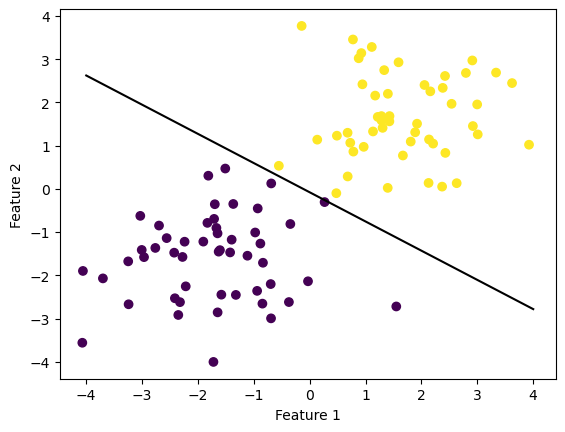

In [3]:
fig = plt.scatter(X[:,0], X[:,1], c = y) #means [ first_row:last_row , column_0]
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")





def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")


fig = draw_line(p.w, -4, 4)

Visualization of the perceptron's resulting linear separator

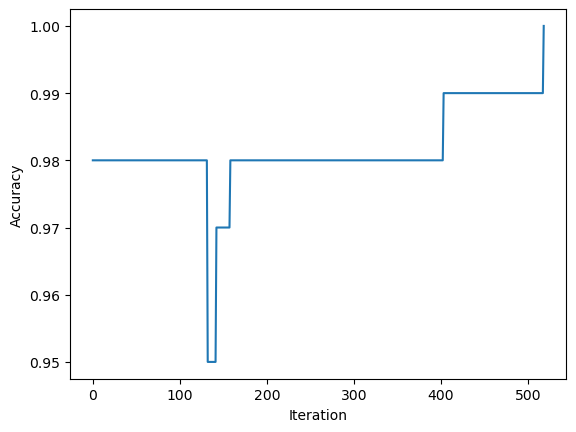

In [4]:
fig = plt.plot(p.history) 
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")



Visualization of the number of iterations it took the perceptron algorithm to converge

# Linearly Separable Example 2

In [5]:
weight2 = 0
history2 = [] 
max_steps = 1000000

p2 = Perceptron(weight,history)

np.random.seed(12345)

n2 = 100 #the number of data points
p_features2 = 3 #the number of features ends up being 2 since we do n_features = p_features - 1


X2, y2 = make_blobs(n_samples = n2, n_features = p_features2 - 1, centers = [(-1, -1.888), (10, 1.7)])
X_2 = np.append(X2, np.ones((X2.shape[0], 1)), 1)




p2.fit(X2,y2, max_steps)



#print(p2.score(X2,y2))


print(p2.history[-10:])
print(p2.w)



[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.0]
[ 0.25738542  0.90742861 -1.74920064]


In this example the perceptron algorithm reaches a score of 1.0, meaning it was able to succesfully linearly separate the data.

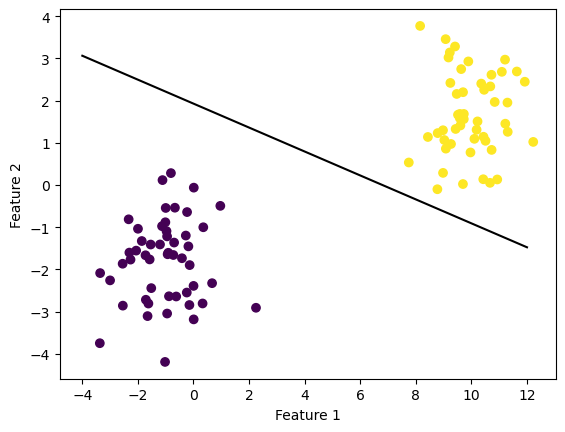

In [6]:
fig = plt.scatter(X2[:,0], X2[:,1], c = y2) 
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")





def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")


fig = draw_line(p2.w, -4, 12)

Visualization of the perceptron's resulting linear separator

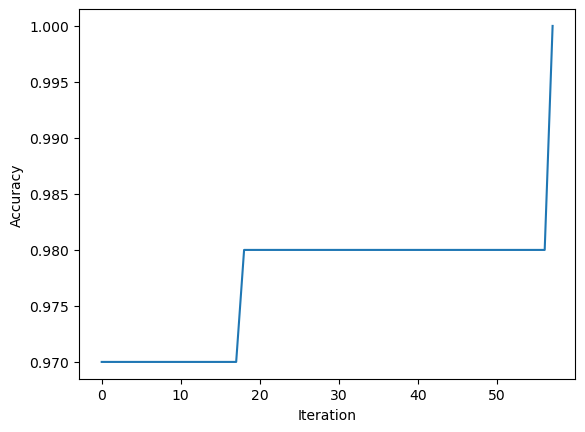

In [7]:
fig = plt.plot(p2.history) 
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")



Visualization of the number of iterations it took the perceptron algorithm to converge

# Non-linearly Separable Example

In [8]:
weight3 = 0
history3 = [] 
max_steps = 10000

p3 = Perceptron(weight,history)

np.random.seed(12345)

n3 = 100 #the number of data points
p_features3 = 4 #the number of features ends up being 2 since we do n_features = p_features - 1


X3, y3 = make_blobs(n_samples = n3, n_features = p_features3 - 1, centers = [(-1, -1.7), (1.23, 1.7)])
X_3 = np.append(X3, np.ones((X3.shape[0], 1)), 1)


p3.fit(X3,y3, max_steps)


print(p3.history[-10:])
print(p3.w)


[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
[ 1.436715    4.80069223 -0.74920064]


The score did not reach 1.0, so the perceptron algorithm wasn't able to converge signifying that the data is not linearly separable.

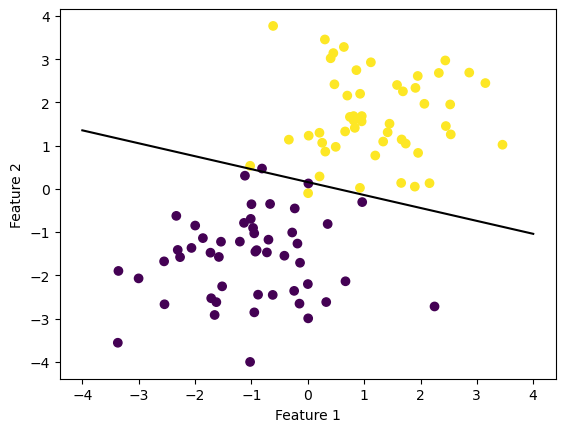

In [9]:
fig = plt.scatter(X3[:,0], X3[:,1], c = y2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")





def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")


fig = draw_line(p3.w, -4, 4)

Visualization of the perceptron's resulting linear separator

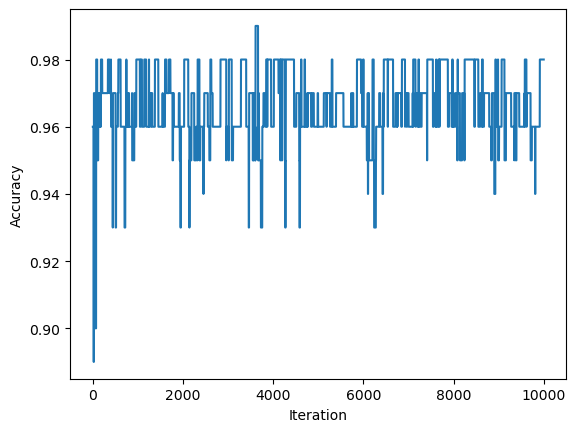

In [10]:
fig = plt.plot(p3.history) #plot is not representative of iterations (no such thing as .5 iterations) #gotta fix somehow w/ matplotlib adjusment probably
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Visualization of the number of iterations it took the perceptron algorithm to converge

# Multi-Dimensional Example

In [11]:
weight4 = 0
history4 = [] 
max_steps = 10000
p4 = Perceptron(weight,history)

np.random.seed(12345)

n4 = 100 #the number of data points
p_features4 = 6 #the number of features ends up being 5 since we do n_features = p_features4 - 1 in make_blobs() call below


X4, y4 = make_blobs(n_samples = n4, n_features = p_features4 - 1, centers = [(-1, -1.7,-1.5, 0, 0), (1.24, 1.7,1, 0, 0)]) #need to adjust centers to 5-dimensional space
X_4 = np.append(X4, np.ones((X4.shape[0], 1)), 1)

print(X4.shape) #to check that our data is multi-dimensional (5-dimensions in this case) as intended, meaning there are 5 features recorded for each sample.

p4.fit(X4,y4, max_steps)


print(p4.history[-10:])
print(p4.w)

(100, 5)
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]
[4.13255343 3.42143787 1.49084004 0.05145049 0.44583831 0.3426921 ]


In this example the perceptron algorithm reaches a score of 1.0, meaning it was able to succesfully linearly separate the data, even in more than 2 dimensions (5 in this experiment).

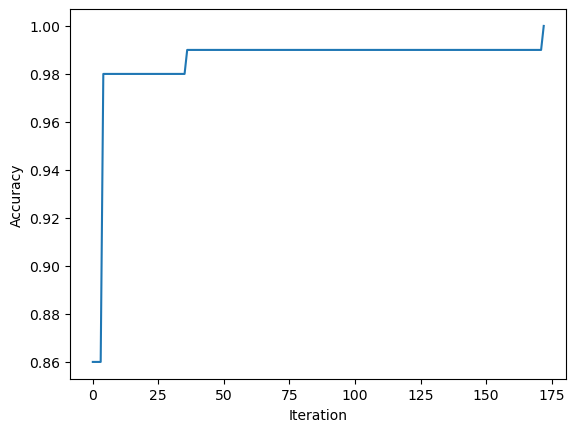

In [12]:
fig = plt.plot(p4.history) #plot is not representative of iterations (no such thing as .5 iterations) #gotta fix somehow w/ matplotlib adjusment probably
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

Visualization of the number of iterations it took the perceptron algorithm to converge

# Runtime complexity of perceptron udpate rule

The runtime complexity of a single iteration of the perceptron update rule is O(n) where n represents our data's number of features. To perfom the perceptron update rule we must compute the dot product of the parameter vector and one sample vector from our modified feature matrix both of which have an entry size that's dependent on the data's number of features, which has multiplication and addition as its relevant operations. Our data's number of samples doesn't affect the time complexity of a single iteration since we only end up working with one sample (chosen randomly) at the time of the update and picking and accessing a sample in the feature matrix takes constant time.